In [1]:
import os 
import pandas as pd 
import sys 
import re 

current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path,'..','..','..'))  # '..','..','..' # '..','..'
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    
from pipeline.plotting.TS_analysis import plot_TS
from jupyter_ipynb.NetMob_training_analysis.plotting import plot_boxplot_on_metric
from experiences.convert_df_to_latex import dataframe_to_latex,parse_index_exp1_2,parse_index_exp4
from experiences.convert_df_to_latex import update_df_metrics,load_csv
from experiences.convert_df_to_latex import tackle_trial_j as tackle_trial_for_distrib
from experiences.common_results import dic_exp_to_names,find_baseline,dic_trials

folder_path = '../../save/K_fold_validation/training_wo_HP_tuning'  # '../../save'


In [2]:
for exp_i,trials in dic_trials.items():
    if exp_i == 'set_experience_HERE' :#'Exp1_subway_in': #'set_experience_HERE': # set_experience_HERE # 'Exp1_subway_in'# 'Exp4_15min' # 'Exp4' # 'Exp3_bike_15min_h4' # 'Exp3' # 'Exp1'
        for trial_j in trials:
            df_j_all = pd.DataFrame()
            for n_bis in range(1,6):
                file_path = f"{folder_path}/{exp_i}/{dic_exp_to_names[exp_i]}/{trial_j}_bis{n_bis}/Losses_{trial_j}_bis{n_bis}.csv"
                df_j = pd.read_csv(file_path,index_col = 0)
                df_j.columns = [f'Train_{n_bis}',f'Valid_{n_bis}']
                df_j_all = pd.concat([df_j_all,df_j],axis=1)
            plot_TS(df_j_all,width=1500,height=400,bool_show=True,title=f"{exp_i}, {trial_j}",x_datetime = False)


In [3]:
import os 
import pandas as pd 
from pipeline.plotting.TS_analysis import plot_TS

def tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics,plot_losses):
    df_j_all = pd.DataFrame()
    metric_i = []
    for n_bis in range(1,6):
        df_j_all, metric_i = load_csv(folder_path,dic_exp_to_names,exp_i,trial_j,n_bis,df_j_all,metric_i,metrics)

    metric_i = pd.DataFrame(pd.DataFrame(metric_i).agg(['mean','std']).unstack()).T
    metric_i.index = [f"{trial_j}"]
    L_metrics.append(metric_i)
    if plot_losses:
            plot_TS(df_j_all,width=1500,height=400,bool_show=True,title=f"{exp_i}, {trial_j}",x_datetime = False)
    return L_metrics

folder_path = 'save/K_fold_validation/training_wo_HP_tuning' # '../../..'
metrics = ['rmse','mae','mase']
plot_losses = False 

exp_i = 'Exp2'
trials = dic_trials[exp_i]
experiences = ['Exp2']
print(f"\n------------------ {exp_i} ---")
L_metrics = []
for trial_j in trials:
    L_metrics = tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics,plot_losses)

if exp_i == 'Exp2':
    exp_i_tmp = 'Exp3_bike_15min_h4'
    trial_j = 'STAEformer_bike_out_calendar__e200_h4'
    L_metrics = tackle_trial_j(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics,plot_losses)

    df_metrics_all = pd.concat(L_metrics)

    horizons = list(set([c[0].split('_')[-1][1:] for c in df_metrics_all.columns]))
    for horizon in horizons:
        df_horizon = df_metrics_all[[c for c in df_metrics_all.columns if c[0].endswith(f"_h{horizon}")]].dropna()

        globals()[f"df_metrics_{exp_i}_h{horizon}"] = df_horizon.sort_values(by=[(f'rmse_h{horizon}','mean')])

        baseline_index = find_baseline(exp_i,h=horizon)
        for c in globals()[f"df_metrics_{exp_i}_h{horizon}"].columns:
            if 'mean' == c[1]:
                globals()[f"df_metrics_{exp_i}_h{horizon}"][c] = globals()[f"df_metrics_{exp_i}_h{horizon}"][c].apply(lambda x: f"{round(x,2)} ({round(100*(-1+x/globals()[f'df_metrics_{exp_i}_h{horizon}'].loc[baseline_index,c]),2)}\%)")
        
        display(globals()[f"df_metrics_{exp_i}_h{horizon}"])



------------------ Exp2 ---


rmse_h4  \
                                                                                                 mean   
STAEformer_bike_out_weather_calendar_late_fusio...  4.83 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  4.84 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  4.84 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  4.87 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               4.87 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  4.88 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               4.91 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  4.92 (STAEformer_bike_out_calendar__e200_h4   ...   

                                                              \
                                                         std   
STAEformer_bike_out_weather_calendar_late_fusio...  0.012406   
STAEformer_bike_out_weather_calendar_late_fusio...  0.027174   
STAEformer_bike_out_weather_calendar_late_fusio...  0.044309   
STAEformer_bike_out_weather_calendar_early_fusi...  0.033497   
STAEformer_bike_out_calendar__e200_h4               0.022118   
STAEformer_bike_out_weather_calendar_early_fusi...  0.033146   
STAEformer_bike_out_calendar__e200_h4               0.022439   
STAEformer_bike_out_weather_calendar_early_fusi...  0.031585   

                                                                                               mae_h4  \
                                                                                                 mean   
STAEformer_bike_out_weather_calendar_late_fusio...  3.06 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  3.05 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  3.07 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  3.07 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               3.06 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  3.07 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_calendar__e200_h4               3.08 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_early_fusi...  3.09 (STAEformer_bike_out_calendar__e200_h4   ...   

                                                              \
                                                         std   
STAEformer_bike_out_weather_calendar_late_fusio...  0.019262   
STAEformer_bike_out_weather_calendar_late_fusio...  0.010412   
STAEformer_bike_out_weather_calendar_late_fusio...  0.028939   
STAEformer_bike_out_weather_calendar_early_fusi...  0.016420   
STAEformer_bike_out_calendar__e200_h4               0.023158   
STAEformer_bike_out_weather_calendar_early_fusi...  0.022589   
STAEformer_bike_out_calendar__e200_h4               0.012874   
STAEformer_bike_out_weather_calendar_early_fusi...  0.017975   

                                                                                              mase_h4  \
                                                                                                 mean   
STAEformer_bike_out_weather_calendar_late_fusio...  0.8 (STAEformer_bike_out_calendar__e200_h4    ...   
STAEformer_bike_out_weather_calendar_late_fusio...  0.79 (STAEformer_bike_out_calendar__e200_h4   ...   
STAEformer_bike_out_weather_calendar_late_fusio...  0.8 (STAEformer_bike_out_calendar__e200_h4    ...   
STAEformer_bike_out_weather_calendar_early_fusi...  0.8 (STAEformer_bike_out_calendar__e200_h4    ...   
STAEformer_bike_out_calendar__e200_h4               0.79 (STAEformer_bike_out_ca

In [12]:
exp_i = 'Exp2' # 'Exp2' #'Exp1_subway_in' # 'Exp1' #'Exp4_15min', 'Exp4' #'Exp3_bike_15min_h4' #'Exp3' #'Exp1'
metrics = ['rmse','mae','mase']
trials = dic_trials[exp_i]
print(f"\n------------------ {exp_i} ---")

L_metrics = []
for trial_j in trials:
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i,trial_j,metrics)

if exp_i == 'Exp4':
    exp_i_tmp = 'Exp3'
    trial_j = 'STAEformer_bike_out_calendar__e200_h1'
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics)
if exp_i == 'Exp4_15min':
    exp_i_tmp = 'Exp3_bike_15min_h4'
    trial_j = 'STAEformer_bike_out_calendar__e200_h4'
    L_metrics = tackle_trial_for_distrib(folder_path,dic_exp_to_names,L_metrics,exp_i_tmp,trial_j,metrics)
    
df_metrics_all = pd.concat(L_metrics)



def change_legend(row):
    if row.legend_group == 'Other Methods':
        if 'early_fusion' in row.name:
            return 'Early Fusion Other Methods '
        elif 'late_fusion' in row.name:
            return 'Late Fusion Other Methods '
        else:
            return row.legend_group
    else:
        return row.legend_group

def reduce_id(x):
    x = x.replace('late_fusion_','L_')
    x = x.replace('early_fusion_','E_')
    x = x.replace('s_proj_t_proj','S-Proj T-Proj')
    x = x.replace('repeat_t_proj','Repeat T-Proj')
    x = x.replace('backbone','BB')
    return x 


configs_to_keep = [
    'Baseline',
    # Model backbone : ---- 
    'late_fusion_traffic_model_backbone_In24_adp16',
    'early_fusion_traffic_model_backbone_In24_adp16',
    # CABB with adpQ = 0 ---
    'early_fusion_CABB_In24_ctxIn8_adp16_adpQ0',
    'late_fusion_CABB_In24_ctxIn8_adp16_adpQ0',
    # CABB with adpQ = 24 ---
    'early_fusion_CABB_In24_ctxIn8_adp16_adpQ24',
    'late_fusion_CABB_In24_ctxIn8_adp16_adpQ24',
    # 'early_fusion_CABB_In24_ctxIn24_adp16_adpQ24',
    # 'late_fusion_CABB_In24_ctxIn24_adp16_adpQ24',
    
    # Others ---
    'late_fusion_simple_embedding',
    'early_fusion_shared_embedding',
    'early_fusion_independant_embedding'   
] 
configs_to_keep = None 

# palette = ['#4e79a7','#f28e2b','#e15759', '#59a14f', '#c7e9c0','#1a4314' ]
# # legend_groups = ['Baseline','Independant Embedding','Shared Embedding','Early Fusion Other Methods ','Late Fusion Other Methods ']
legend_groups = ['Baseline', 'Early Fusion S-Proj T-Proj', 'Late Fusion S-Proj T-Proj', 'Early Fusion Repeat T-Proj', 'Late Fusion Repeat T-Proj']

palette = ['#4e79a7','#f28e2b' ]
horizons = list(set([c.split('_')[-1][1:] for c in df_metrics_all.columns]))
metric_i = 'MASE'
for horizon in horizons:
    print('\n----------------')
    print(f"Horizon: {horizon}")
    df_horizon = df_metrics_all[[c for c in df_metrics_all.columns if c.endswith(f"_h{horizon}")]].dropna()

    df_horizon = update_df_metrics(df_horizon,exp_i)
    df_horizon['legend_group'] = df_horizon.apply(change_legend,axis = 1)

    if configs_to_keep is not None: 
        df_horizon = df_horizon[df_horizon['id'].isin(configs_to_keep)]
    df_horizon['id'] = df_horizon['id'].apply(reduce_id)
    df_horizon = df_horizon[df_horizon['legend_group'].isin(legend_groups)]

    legend_groups = ['Baseline','Others']
    df_horizon['id'] = df_horizon['id'].apply(lambda x: x.replace('E_independant_embedding','E Independant Embd'
                                                              ).replace('E_shared_embedding','E Shared Emb'
                                                              ).replace('E_traffic_model_BB','E Backbone'
                                                            ).replace('E_Repeat T-Proj','E Repeat T-Proj'
                                                              ).replace('L_Repeat T-Proj','L Repeat T-Proj'
                                                              ).replace('E_S-Proj T-Proj','E S-Proj T-Proj'      
                                                            ).replace('L_S-Proj T-Proj','L S-Proj T-Proj'
                                                            )                                                             
                                )
    df_horizon['legend_group'] = df_horizon['legend_group'].apply(lambda x: 'Others' if x not in ['Baseline'] else x)
    

    title = f'{metric_i} Distribution' + ' per Integration Strategy of Bike-Out Prediction at\n' +f'Horizon [{15*(int(horizon)-1)} - {15*(int(horizon))}]min'
    # plot_boxplot_on_metric(df_horizon, metric_i='mae', xaxis_label="Config", legend_group='legend_group', width=800, height=600, 
    #                             save_path=None,palette =palette ,legend_groups =legend_groups )
    plot_boxplot_on_metric(df_horizon, metric_i=metric_i.lower(), xaxis_label="Config", legend_group='legend_group', width=800, height=600, save_path=None,palette =palette ,legend_groups =legend_groups,title=title )
    # plot_boxplot_on_metric(df_horizon, metric_i='mase', xaxis_label="Config", legend_group='legend_group', width=1200, height=400, 
    #                             save_path=None)
    


------------------ Exp2 ---

----------------
Horizon: 4


Loading BokehJS ...

In [ ]:
# --- Captions Dictionary ---
captions = {
    "Exp1": r"Prediction of Subway-Out with STAEformer using contextual data 'Subway-In' according to different Integration Strategies. Metrics are averaged over 5 runs.",
    "Exp1_subway_in": r"Prediction of Subway-In with STAEformer using contextual data 'Subway-Out' according to different Integration Strategies. Metrics are averaged over 5 runs.",
    "Exp2": r"Prediction of Bike-Out (15min aggregation) at a 60-minute horizon with STAEformer, using weather forecasts as contextual data. Metrics are averaged over 5 runs.",
    "Exp4": r"Prediction of Bike-Out with STAEformer using heterogenous contextual data 'subway-in-subway-out' (1h aggregation) at horizon +60min. The table compares the baseline with different configurations of the CrossAttnBackBone model. Metrics are averaged over 5 runs.",
    "Exp4_15min": r"Prediction of Bike-Out with STAEformer using heterogenous contextual data 'subway-in-subway-out' (15min aggregation) at horizon +60min. This table compares various CrossAttnBackBone model configurations. Metrics are averaged over 5 runs.",
     "Exp4_15min_h1": r"Prediction of Bike-Out with STAEformer using heterogenous contextual data 'subway-in-subway-out' (15min aggregation) at horizon +15min. This table compares various CrossAttnBackBone model configurations. Metrics are averaged over 5 runs.",
}

# --- Generate and Print LaTeX Tables ---
print("%%% LaTeX code for Experiment 1 Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_h4, captions["Exp1"], "exp1_subway_context", parse_index_exp1_2)
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 1 Horizon +15min Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_subway_in_h1, captions["Exp1_subway_in"], "exp1_subway_context", lambda x: parse_index_exp1_2(x, contextual='subway_out'))
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 1 Horizon +60min Table %%%\n")
latex_table_1 = dataframe_to_latex(df_metrics_Exp1_subway_in_h4, captions["Exp1_subway_in"], "exp1_subway_context", lambda x: parse_index_exp1_2(x, contextual='subway_out'))
print(latex_table_1)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 2 Table %%%\n")
# Note: parse_index_exp1_2 is reused as it correctly handles the index format for Exp2
latex_table_2 = dataframe_to_latex(df_metrics_Exp2_h4, captions["Exp2"], "exp2_bike_weather", parse_index_exp1_2)
print(latex_table_2)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 4 Table %%%\n")
latex_table_4 = dataframe_to_latex(df_metrics_Exp4_h1, captions["Exp4"], "exp4_bike_hetero", parse_index_exp4)
print(latex_table_4)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 4 (15min) at horizon +60min Table %%%\n")
# Note: parse_index_exp4 is reused as it correctly handles the index format for Exp4_15min
latex_table_4_15min = dataframe_to_latex(df_metrics_Exp4_15min_h4, captions["Exp4_15min"], "exp4_bike_hetero_15min", parse_index_exp4)
print(latex_table_4_15min)

print("\n" + "="*80 + "\n")

print("\n------------------------------------------------\n%%% LaTeX code for Experiment 4 (agg 15min) at horizon + 15min Table %%%\n")
latex_table_4_15min_h1 = dataframe_to_latex(df_metrics_Exp4_15min_h4, captions["Exp4_15min_h1"], "exp4_bike_hetero_15min", parse_index_exp4)
print(latex_table_4_15min_h1)

print("\n" + "="*80 + "\n")


%%% LaTeX code for Experiment 1 Table %%%

\begin{table}[!htb]
    \centering
    \caption{Prediction of Subway-Out with STAEformer using contextual data 'Subway-In' according to different Integration Strategies. Metrics are averaged over 5 runs.}
    \label{tab:exp1_subway_context}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{{llcccccc}}
        \toprule
        Contextual Data & Integration Strategy & \multicolumn{2}{c}{ RMSE (h4) } & \multicolumn{2}{c}{ MAE (h4) } & \multicolumn{2}{c}{ MASE (h4) } \\
        \cmidrule(lr){1-2} \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}
         &  & Mean & Std & Mean & Std & Mean & Std \\
        \midrule
        Yes & Early Fusion Feature Extractor & 40.46 (-5.3\%) & 0.1824 & 22.27 (-4.02\%) & 0.0953 & 0.69 (-3.53\%) & 0.0030 \\
        Yes & Early Fusion Shared Embedding & 40.76 (-4.61\%) & 0.4171 & 22.3 (-3.88\%) & 0.2049 & 0.69 (-3.38\%) & 0.0064 \\
        Yes & Late Fusion Traffic Model Backbone & 40.8 (-4.52\%) & 0.2193 & 

# Get Results on Rainy Time Slots (and not global averaged performance)

In [22]:

import os 
import sys 

current_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.accuracy_comparison import load_trainer_ds_from_2_trials,get_predict_real_and_inputs,get_model_args
from examples.accuracy_comparison import get_rainy_indices,plot_analysis_comparison_2_config,get_previous_and_prediction,get_gain_from_mod1
import torch 
from pipeline.utils.metrics import evaluate_metrics

def get_dict_metrics_on_rainy_events(full_predict1,full_predict2,Y_true,X,args_init1,args_init2,ds2):
    h_idx = 1
    metric_list = ['rmse','mse','mae','mase','mape']
    previous,_,_,_ = get_previous_and_prediction(full_predict1,full_predict2,Y_true,X,h_idx)
    assert args_init1.horizon_step == args_init1.step_ahead, "Horizon step must be equal to step_ahead here"

    print("\nComparison on between models across all time-slots followed by comparison on Rainy Events Only")
    _,train_rainy_indices,_ = get_rainy_indices(args = args_init2,ds = ds2,training_mode = 'train')
    print(f"Number of rainy time-slots in the train set: {len(train_rainy_indices)}, i.e {len(train_rainy_indices)/len(ds2.tensor_limits_keeper.df_verif_train)*100:.2f} % of the train set")
    # ---- Plot Accuracy comparison on rainy moments only ----
    mask,rainy_indices,df_weather = get_rainy_indices(args = args_init2,ds = ds2,training_mode = 'test')
    print(f"Number of rainy time-slots in the test set: {len(rainy_indices)}, i.e {len(rainy_indices)/len(ds2.tensor_limits_keeper.df_verif_test)*100:.2f} % of the test set\n")

    dates = mask[mask].index
    masked_index = mask.reset_index(drop=True)
    masked_index = masked_index[masked_index].index


    # --- Get Prediction on rainy time-slots:
    rainy_predict1 = torch.index_select(full_predict1,0,torch.tensor(masked_index).long())
    rainy_predict2 = torch.index_select(full_predict2,0,torch.tensor(masked_index).long())
    rainy_Y_true = torch.index_select(Y_true,0,torch.tensor(masked_index).long())
    rainy_previous = torch.index_select(previous,0,torch.tensor(masked_index).long())

    dic_metric1 = evaluate_metrics(rainy_predict1,rainy_Y_true,metrics = metric_list, previous = rainy_previous,horizon_step = h_idx)
    dic_metric1 = dict(dic_metric1.copy())
    dic_metric2 = evaluate_metrics(rainy_predict2,rainy_Y_true,metrics = metric_list, previous = rainy_previous,horizon_step = h_idx)
    dic_metric2 = dict(dic_metric2.copy())
    return dic_metric1,dic_metric2



dic_contextual_data = {'bike_out': [[]],  #,['weather','calendar']
                    }

dic_fusion_strategie = {('bike_out',()): [''],
                        ('bike_out',('weather','calendar')):['early_fusion','late_fusion'],
                        }
             
dic_feature_extractor = {('bike_out',()): [''],
                        ('bike_out',('weather','calendar')):['repeat_t_proj','feature_extractor']
                        }


model_name = 'STAEformer'
epochs = 200
range_k = range(1,6)
training_mode = 'test'
modification = {'shuffle':False,
                'data_augmentation':False,
                'torch_compile': False,
                }
log = ''
Exp = 'Exp2'  # 'Exp2'

for horizon in [4]:
    for target in ['bike_out']:
        for contextual_data in dic_contextual_data[target]:
            reversed_metric = False
            fusion_strategies = dic_fusion_strategie[(target,tuple(contextual_data))]
            for fusion_strategie in fusion_strategies:
                feature_extractors = dic_feature_extractor[(target,tuple(contextual_data))]
                for feature_extractor in feature_extractors:
                    if not('weather' in contextual_data):
                        print('\n------------------------------------------------------\nContextual data:\n')
                        contextual_data1 = ['weather','calendar'] if target == 'bike_out' else ['subway_in','weather','calendar']
                        fusion_strategie1 = dic_fusion_strategie[(target,tuple(contextual_data1))][0]
                        feature_extractor1 = dic_feature_extractor[(target,tuple(contextual_data1))][0]

                        trial_id1 = f"{model_name}_{target}_calendar__e{epochs}_h{horizon}_bis"
                        trial_id2 = f"{model_name}_{target}_{'_'.join(contextual_data1)}_{fusion_strategie1}_{feature_extractor1}__e{epochs}_h{horizon}_bis"
                        reversed_metric = True 
                    else:
                        trial_id1 = f"{model_name}_{target}_calendar__e{epochs}_h{horizon}_bis"
                        trial_id2 = f"{model_name}_{target}_{'_'.join(contextual_data)}_{fusion_strategie}_{feature_extractor}__e{epochs}_h{horizon}_bis"

                    model_args,_,path_model_args,_ = get_model_args(target,model_name,save_folder_name = f'{Exp}/{target}_{model_name}')
                    ds1,ds2,args_init1,args_init2 = None, None, None, None
                    for k in range_k:
                        trial_id1_updated = f"{trial_id1}{k}_f5"
                        trial_id2_updated = f"{trial_id2}{k}_f5"

                        trainer1,trainer2,ds1,ds2,args_init1,args_init2 = load_trainer_ds_from_2_trials(trial_id1_updated,trial_id2_updated,modification = modification,
                                                                                                        model_args=model_args,
                                                                                                        path_model_args=path_model_args,
                                                                                                        ds1_init=ds1,ds2_init=ds2,
                                                                                                        args_init1=args_init1,args_init2=args_init2,
                                                                                                        )
                                                                                                        

                        full_predict1,full_predict2,Y_true,X = get_predict_real_and_inputs(trainer1,trainer2,ds1,ds2,training_mode=training_mode)

                        globals()[f"trainer1_bis{k}"] = trainer1
                        globals()[f"trainer2_bis{k}"] = trainer2
                        globals()[f"ds1_bis{k}"] = ds1
                        globals()[f"ds2_bis{k}"] = ds2
                        globals()[f"full_predict1_bis{k}"] = full_predict1
                        globals()[f"full_predict2_bis{k}"] = full_predict2

                        dic_metric1,dic_metric2 = get_dict_metrics_on_rainy_events(globals()[f"full_predict1_bis{k}"],globals()[f"full_predict2_bis{k}"],Y_true,X,args_init1,args_init2,ds2)

                        # Keep track on metric from model 1
                        if reversed_metric:
                            dic_metric2 = dict(dic_metric1.copy())
                        RMSE = dic_metric2['rmse_all']
                        MAE = dic_metric2['mae_all']
                        MASE = dic_metric2['mase_all']
                        MAPE = dic_metric2['mape_all']
                        if feature_extractor == []:
                            log += f"{model_name}_{target}__e{epochs}_h{horizon}_bis{k}:   All Steps RMSE = {RMSE:.3f}, MAE = {MAE:.3f}, MASE = {MASE:.3f}, MAPE = {MAPE:.3f}\n"
                        else:
                            log += f"{model_name}_{target}_{'_'.join(contextual_data)}_{fusion_strategie}_{feature_extractor}__e{epochs}_h{horizon}_bis{k}:   All Steps RMSE = {RMSE:.3f}, MAE = {MAE:.3f}, MASE = {MASE:.3f}, MAPE = {MAPE:.3f}\n"

                    print(log)


------------------------------------------------------
Contextual data:

Trial ID 1:  STAEformer_bike_out_calendar__e200_h4_bis1_f5
Trial ID 2:  STAEformer_bike_out_weather_calendar_early_fusion_repeat_t_proj__e200_h4_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp2/bike_out_STAEformer/best_models/STAEformer_bike_out_calendar__e200_h4_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 35040 elts between 2019-01-01 00:00:00 and 2019-12-31 23:45:00
Invalid dates within this fold: 0

>>>Tackle Target dataset: bike_out
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.csv...
df pivoted:  (70049, 434)
df reindexed :  (35040, 434)
Len coverage period:  35040
df filtered:  (35040, 434)
   Loaded data: (35040, 434)
   Dimension after spatial agg: (35040, 26)
   Init Dataset: 'torch.Size(

# Disagregated Approach

Trial ID 1:  _STAEformer_subway_out_calendar__e80_h4_bis1_f5
Trial ID 2:  _STAEformer_subway_out_subway_in_calendar_late_fusion_traffic_model_backbone_InEmb24_adp16__e80_h4_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp1_subway_out/subway_out_STAEformer/best_models/STAEformer_subway_out_calendar__e80_h4_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 35040 elts between 2019-01-01 00:00:00 and 2019-12-31 23:45:00
Invalid dates within this fold: 1233

>>>Tackle Target dataset: subway_out
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_out/subway_out.csv
   Init Dataset: 'torch.Size([35040, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([14962, 40, 7])
   VALID contextual_ds: torch.Size([4987, 40, 7])
   TEST contextual_ds: torch.Size([4987, 40, 7])

>>>Loading calendar inputs ...
Init U/Utarget size:

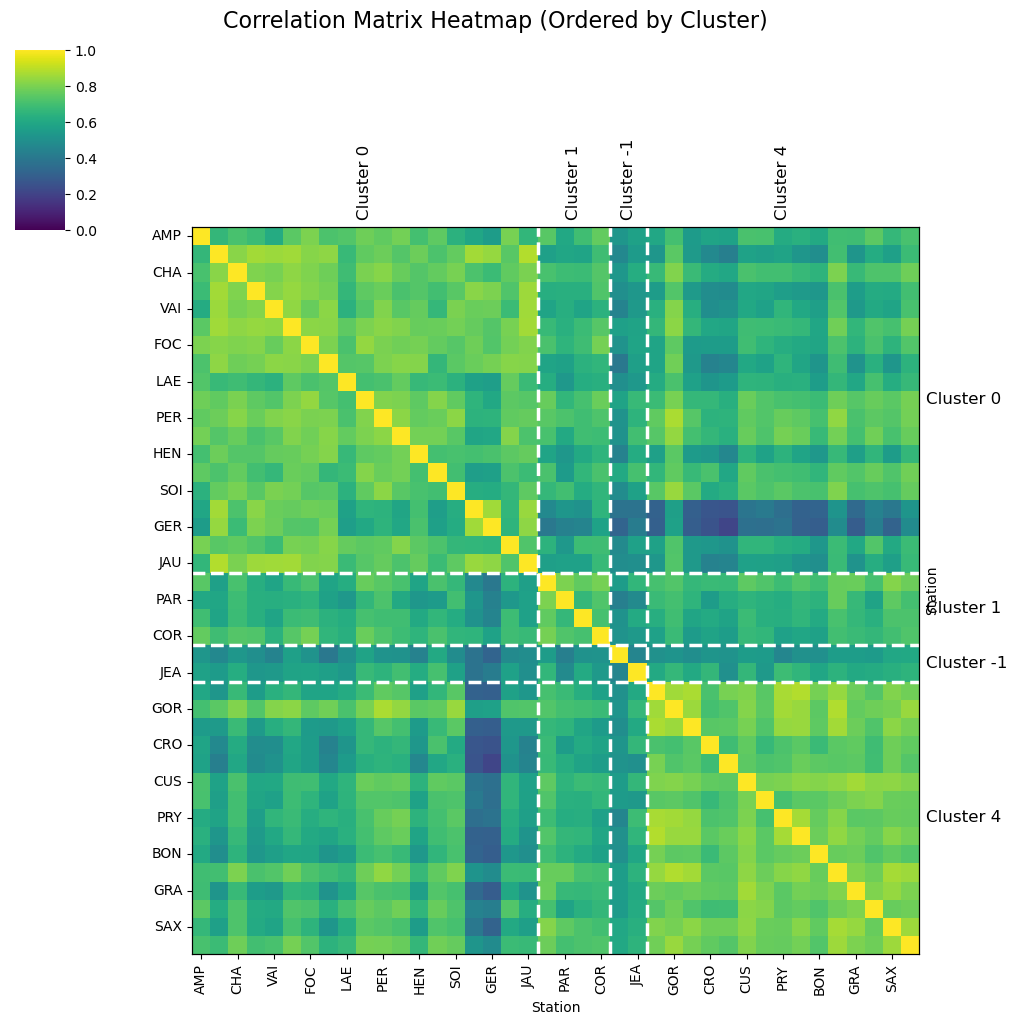

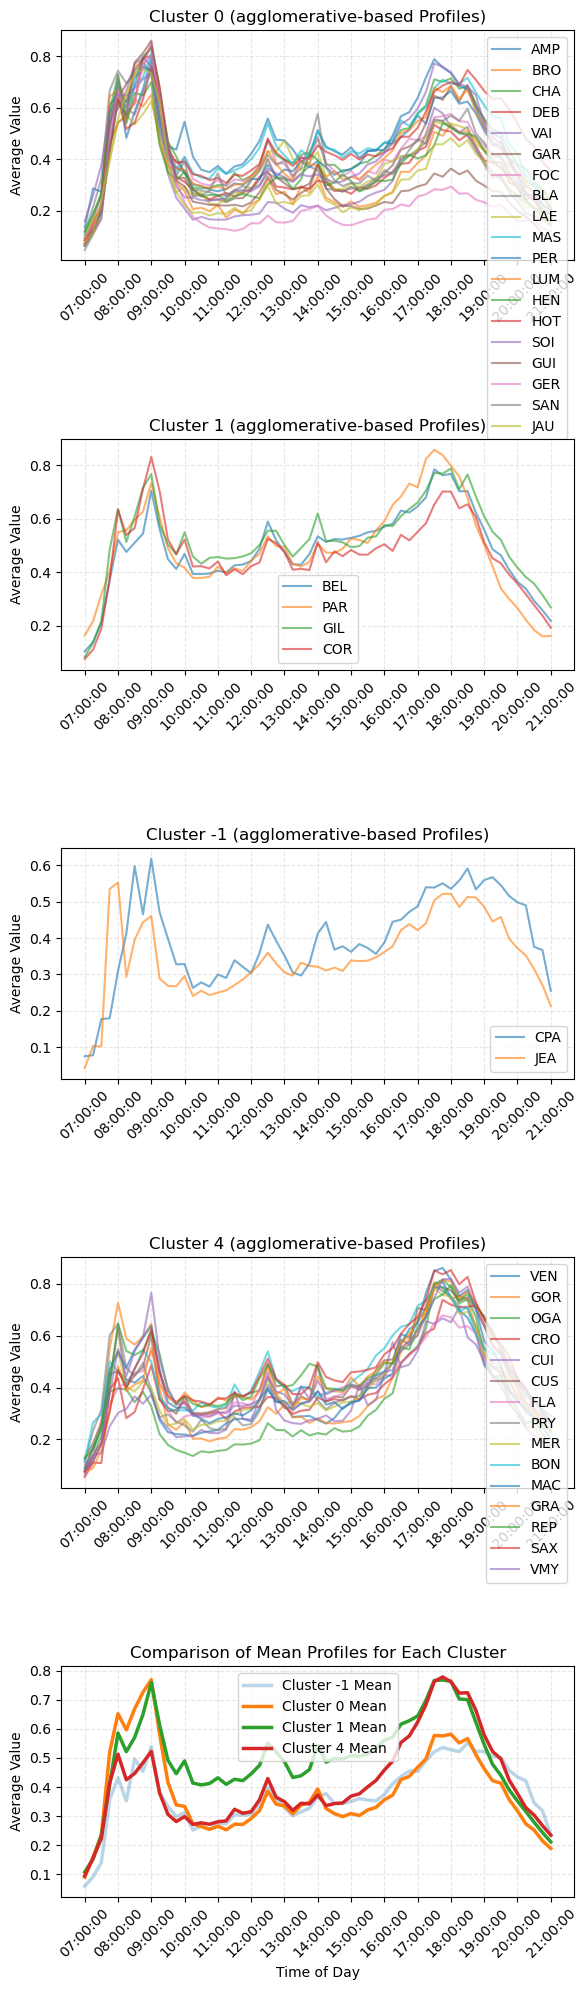

Model1 correspond to :  STAEformer_subway_out_calendar__e80_h4_bis
Model2 correspond to :  STAEformer_subway_out_subway_in_calendar_late_fusion_traffic_model_backbone_InEmb24_adp16__e80_h4_bis
Trial ID 1:  _STAEformer_subway_out_calendar__e80_h4_bis1_f5
Trial ID 2:  _STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e80_h4_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/Exp1_subway_out/subway_out_STAEformer/best_models/STAEformer_subway_out_calendar__e80_h4_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 35040 elts between 2019-01-01 00:00:00 and 2019-12-31 23:45:00
Invalid dates within this fold: 1233

>>>Tackle Target dataset: subway_out
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_out/subway_out.csv
   Init Dataset: 'torch.Size([35040, 40]). 0 Nan values
   TRAIN contextual_ds: torc

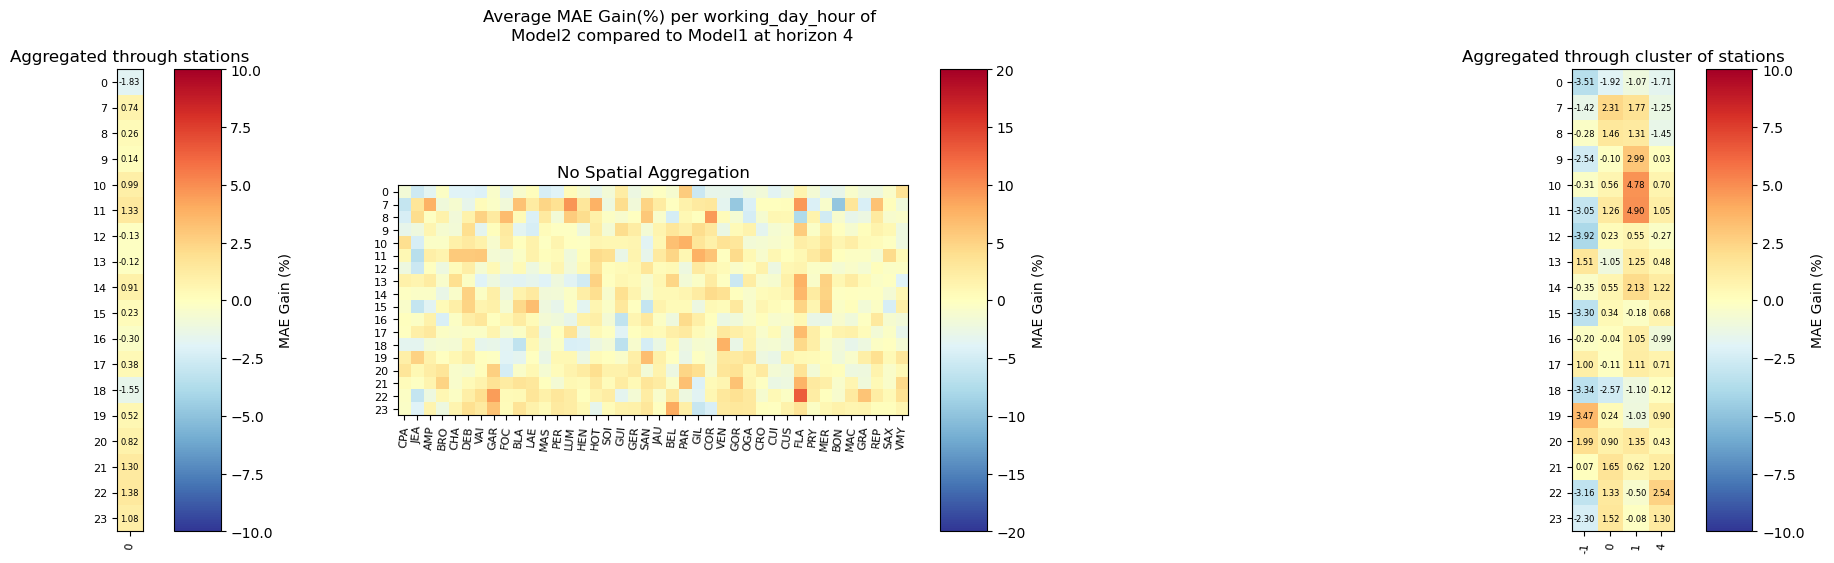

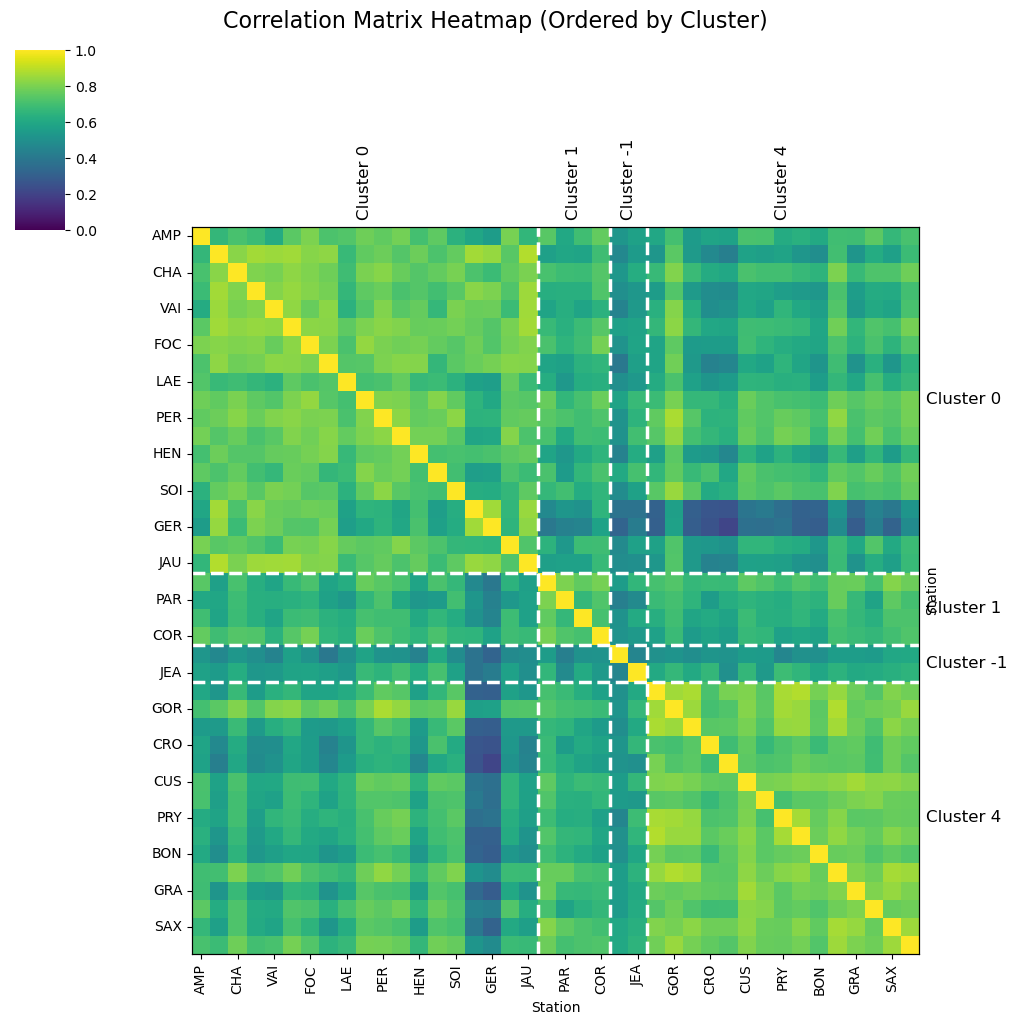

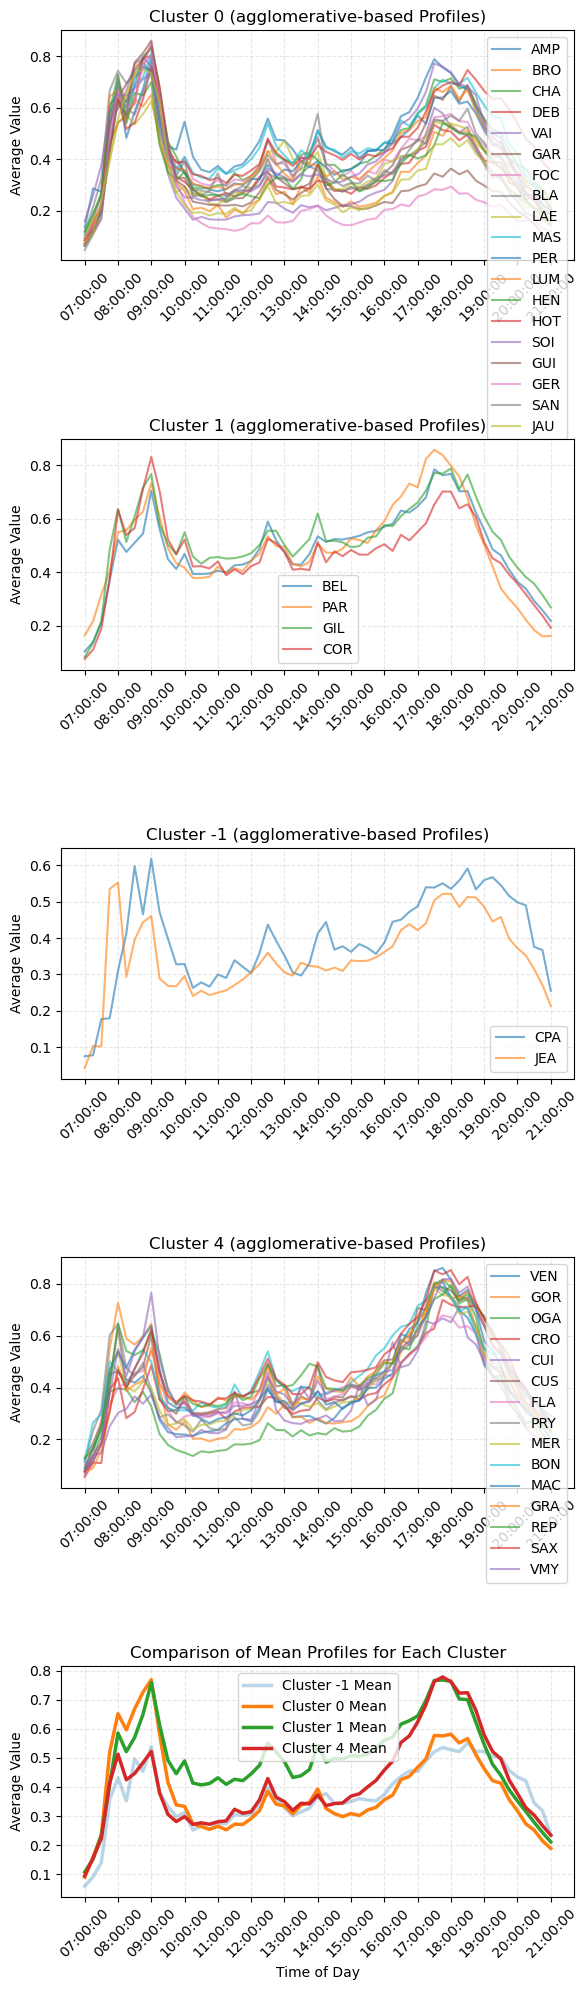

Model1 correspond to :  STAEformer_subway_out_calendar__e80_h4_bis
Model2 correspond to :  STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e80_h4_bis


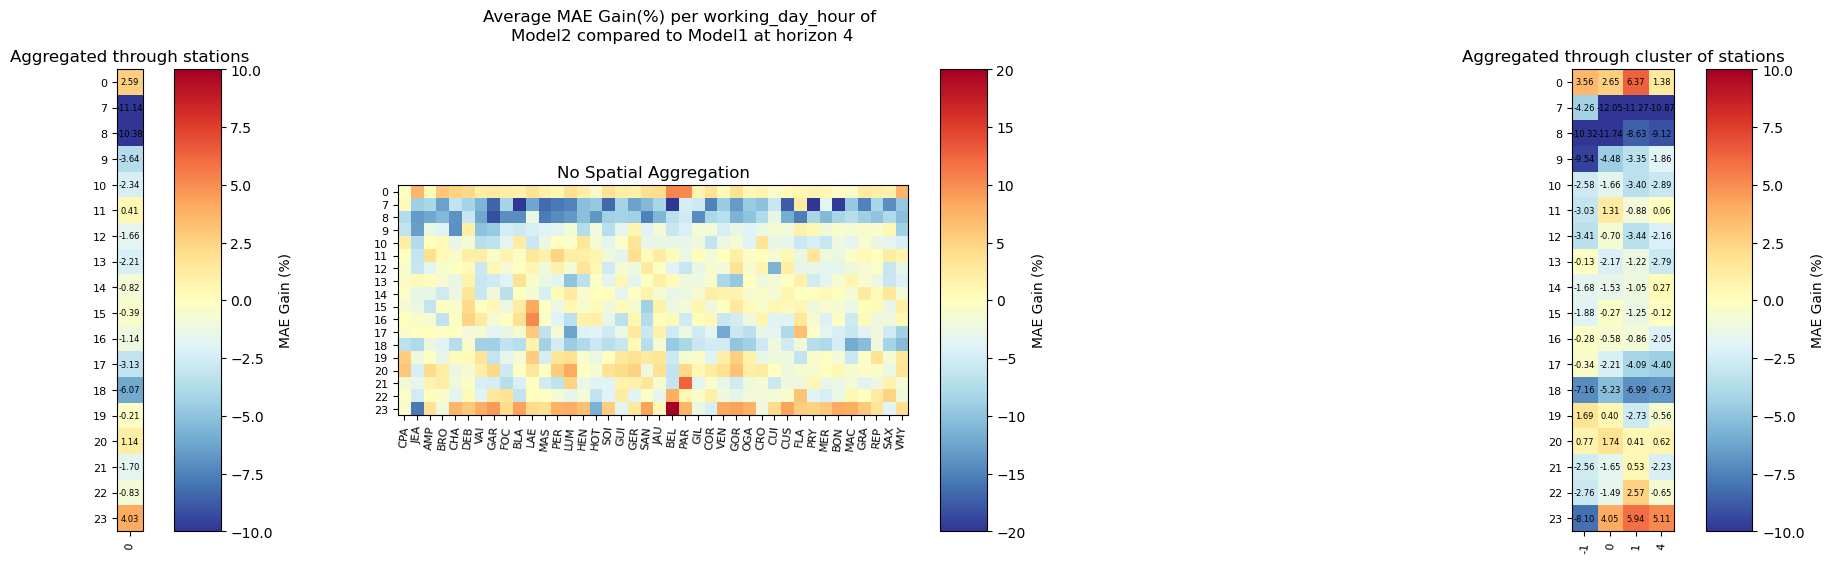

In [10]:
import os 
import sys 
import pandas as pd

current_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.accuracy_comparison import load_trainer_ds_from_2_trials,get_predict_real_and_inputs,get_model_args
from examples.accuracy_comparison import get_rainy_indices,plot_analysis_comparison_2_config,get_previous_and_prediction,get_gain_from_mod1
import torch 
from pipeline.utils.metrics import evaluate_metrics
from pipeline.plotting.plotting import plot_coverage_matshow
from examples.accuracy_comparison import get_rainy_indices,get_model_args,get_desagregated_comparison_plot


folder_path = 'save/K_fold_validation/training_wo_HP_tuning'  # '../../save'
folder = 'Exp1_subway_out' # 'Exp4' # 'Exp4_15min'
target_data = 'subway_out'
model_name = 'STAEformer'
h = 4 # 4 # 1
station_clustering = True
range_k = range(1,6)

trial_ids1 = [f'STAEformer_subway_out_calendar__e80_h{h}_bis',
              f'STAEformer_subway_out_calendar__e80_h{h}_bis',
                ]
trial_ids2 = [f'STAEformer_subway_out_subway_in_calendar_late_fusion_traffic_model_backbone_InEmb24_adp16__e80_h{h}_bis',
              f'STAEformer_subway_out_subway_in_calendar_early_fusion_shared_embedding__e80_h{h}_bis'
              ]
    

trial_id1_in_bis = False
trial_id2_in_bis = False

 
save_folder_name = f'{folder}/{target_data}_{model_name}' 
save_folder_name_bis = f'{folder}/{target_data}_{model_name}'


for trial_id1,trial_id2 in zip(trial_ids1,trial_ids2):
    model_args,model_args_bis,path_model_args,path_model_args_bis = get_model_args(save_folder_name,save_folder_name_bis)
    
    clusterer,full_predict1,full_predict2,train_input,Y_true,L_trainer1,L_trainer2,ds1,ds2,args_init1,args_init2 = get_desagregated_comparison_plot(trial_id1,trial_id2,
                                                                                        model_args = model_args,
                                                                                        model_args_bis = model_args_bis,
                                                                                        path_model_args = path_model_args,
                                                                                        path_model_args_bis = path_model_args_bis,
                                                                                        range_k = range_k,
                                                                                        trial_id1_in_bis=False,
                                                                                        trial_id2_in_bis=False,
                                                                                        station = None,
                                                                                        comparison_on_rainy_events = False,
                                                                                        station_clustering = station_clustering,
                                                                                        folder_path = None,
                                                                                        save_name = None,
                                                                                        heatmap = True,
                                                                                        daily_profile = True,
                                                                                        dendrogram = False
    )

# Attention Weight on 'Early Fusion Spatial-Cross Attention'
- On a obtenue la meilleure performance sur les rainy time-slots avec cette architecture. Analysons en profondeur l'architecture du modèle pour conclure (ou savoir si c'est simplement dû à la Early-Fusion)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f63ccdc3130>
Traceback (most recent call last):
  File "/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/multiprocessing/connection.py", line 936, in wait
    ready = selector.select(timeout)
  File "/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/selectors.py", line 416, in select
 

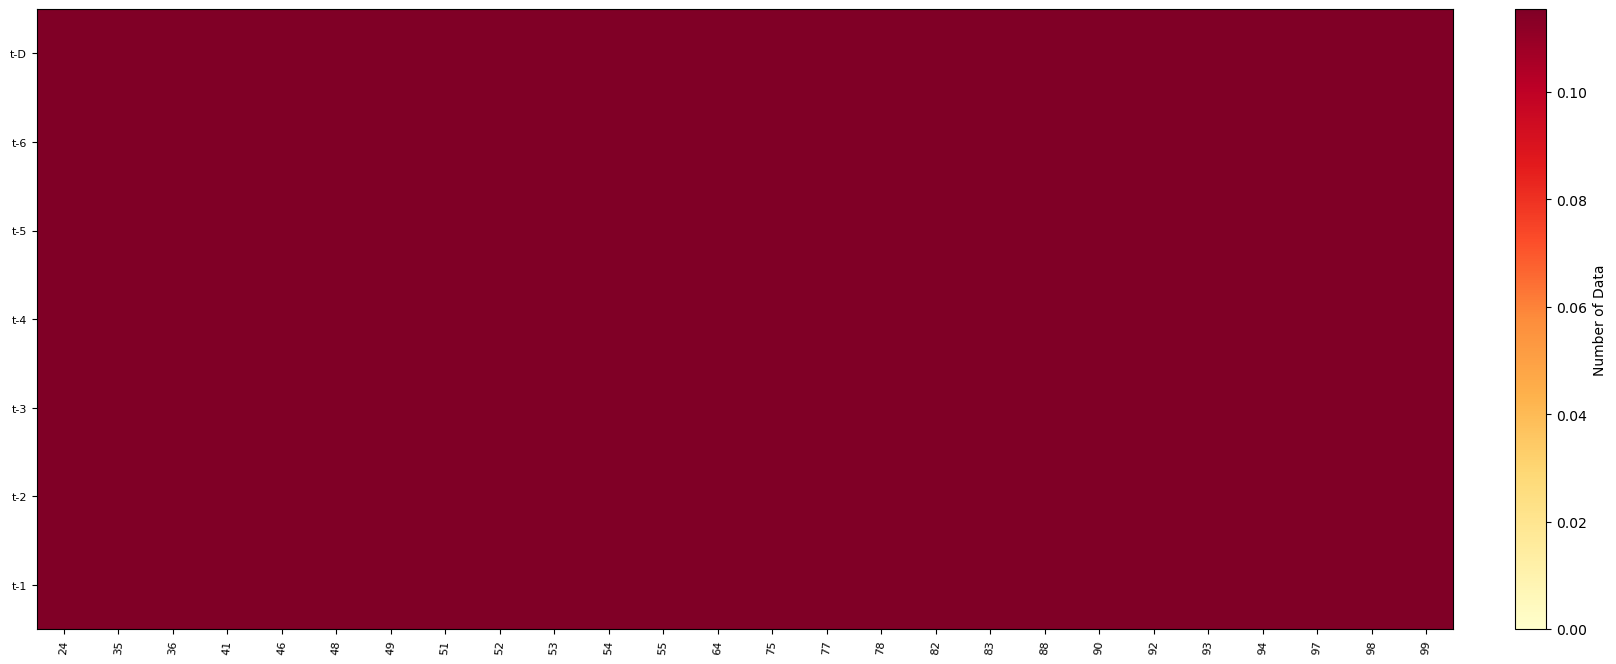

In [21]:
trainer = L_trainer2[0]
ds = ds2
args_init = args_init2 
ds_name = 'weather'
t_columns = ['t-D','t-6','t-5','t-4','t-3','t-2','t-1']

# Forward on test set to get Attention weights: 
all_data = [tensors for tensors in zip(*trainer.dataloader['test'])]
X = torch.cat(all_data[0]).to(args_init.device)
Y = torch.cat(all_data[1]).to(args_init.device)
Xc = [torch.cat(context_tensors).to(args_init.device) for context_tensors in zip(*all_data[2])]
model = trainer.model
model.eval()
with torch.no_grad():
    pred = model(X, Xc)
# ---

attn_layers_s = trainer.model.global_s_attn[f'{ds_name}'].attn_layers

for mha_layer in range(len(attn_layers_s)):
    attn_score = attn_layers_s[mha_layer].attn.attn_score.detach().cpu()
    mean_attn_score = attn_score.mean(0)  # Only one spatial unit
    df_attn_weight = pd.DataFrame(mean_attn_score.squeeze().numpy(),
                                columns = ds.spatial_unit, #args_init.contextual_kwargs[ds_name]['spatial_unit'],
                                index =t_columns #[f"{hist} -- {s_unit}"   for hist in t_columns] 
                                )
    plot_coverage_matshow(df_attn_weight, cmap ="YlOrRd", save = None, cbar_label =  "Number of Data",bool_reversed=False, v_min=0,v_max=3*(1/df_attn_weight.shape[1]),bool_plot = True, cbar_magic_args = True, figsize = (20,8))
    
    # ---